<a href="https://colab.research.google.com/github/Alfian1706/UTS_AVD_221031001/blob/main/Consumer_Complaints_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [1]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

In [2]:
# 2. Load Dataset

# Membaca dataset dari file 'manga.csv' dan menyimpannya ke dalam DataFrame bernama df
df = pd.read_csv('consumer_complaints.csv')

# Menampilkan 5 baris pertama dari dataset untuk melihat struktur dan sampel datanya
df.head()

<ipython-input-2-b8ece43c0893>:4: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('consumer_complaints.csv')


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


## Eksplorasi dan Praproses Data

In [3]:
# 3. Eksplorasi dan Praproses Data

# Menampilkan informasi umum tentang dataset, termasuk jumlah entri, tipe data, dan non-null count per kolom
print("Informasi Data:")
print(df.info())

# Menampilkan jumlah missing values (nilai kosong) pada setiap kolom
print("\nCek Missing Values:")
print(df.isnull().sum())

# Menghapus kolom yang memiliki missing values lebih dari 20% total baris
df = df.dropna(thresh=0.8*len(df), axis=1)

# Menghapus seluruh baris yang masih memiliki missing values setelah proses sebelumnya
df = df.dropna()

# Melakukan encoding pada kolom-kolom bertipe kategorikal (object) menjadi numerik
# Menggunakan LabelEncoder untuk mengubah nilai string menjadi angka
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-n

Bagian kode ini digunakan untuk membersihkan dan menyiapkan data. Pertama, ditampilkan informasi struktur dataset dan jumlah missing values. Kolom dengan terlalu banyak missing values (lebih dari 20%) dihapus, lalu baris yang masih mengandung missing values juga dibuang. Setelah data bersih, semua kolom kategorikal dikonversi menjadi bentuk numerik menggunakan LabelEncoder agar bisa diproses oleh algoritma machine learning.

## Pisahkan fitur dan target

In [4]:
# 4. Pisahkan fitur dan target

# Memisahkan fitur (X) dan target (y) dari dataset
# X berisi semua kolom kecuali 'consumer_disputed?', yang akan digunakan sebagai fitur input
X = df.drop('consumer_disputed?', axis=1)
# y berisi kolom 'consumer_disputed?', yang akan dijadikan target/output untuk prediksi
y = df['consumer_disputed?']

# Menampilkan bentuk (dimensi) dari X dan y untuk memastikan pemisahan berjalan dengan benar
print("Ukuran fitur (X):", X.shape)
print("Ukuran target (y):", y.shape)


Ukuran fitur (X): (551060, 11)
Ukuran target (y): (551060,)


Kode ini memisahkan dataset menjadi dua bagian: X (fitur-fitur yang digunakan untuk memprediksi) dan y (target yang akan diprediksi, yaitu kolom 'consumer_disputed?'). Tidak ada output secara default karena hanya melakukan assignment. Untuk memastikan hasilnya benar, kita tambahkan print(X.shape) dan print(y.shape) agar terlihat jumlah baris dan kolom dari masing-masing bagian.

## Split data train dan test

In [5]:
# 5. Split data train dan test

#Memisahkan data menjadi data latih (train) dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran masing-masing data hasil split
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test :", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test :", y_test.shape)


Ukuran X_train: (440848, 11)
Ukuran X_test : (110212, 11)
Ukuran y_train: (440848,)
Ukuran y_test : (110212,)


test_size=0.2 berarti 20% data akan digunakan untuk pengujian, sisanya 80% untuk pelatihan
random_state=42 digunakan agar hasil pembagian data konsisten (reproducible)

## Feature Scaling

In [6]:
# 6. Feature Scaling

# Melakukan standardisasi (scaling) pada fitur agar semua fitur berada pada skala yang sama
# Ini penting agar model seperti SVM dan KNN bisa bekerja dengan lebih akurat

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Menyesuaikan scaler dengan data latih, lalu transformasi
X_test_scaled = scaler.transform(X_test)        # Transformasi data uji menggunakan scaler yang sama

# Menampilkan contoh hasil scaling dari 5 baris pertama
print("Contoh hasil scaling (X_train):")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

Contoh hasil scaling (X_train):
   date_received   product     issue   company     state   zipcode  \
0      -1.562413  0.025789 -0.941094 -0.507212 -1.211264  1.416368   
1       1.675852 -0.405874 -0.582496  1.395671  0.748051 -1.301603   
2      -0.367628  0.025789 -0.941094 -0.960934  0.805678 -0.039492   
3       1.023349 -1.700865 -2.061713 -0.960934  0.748051 -1.333140   
4       1.420141  0.025789 -0.941094 -0.641037  0.575170 -1.361866   

   submitted_via  date_sent_to_company  company_response_to_consumer  \
0      -2.426530             -1.491492                     -0.458375   
1       0.605848              1.676951                     -0.458375   
2       0.605848             -0.386646                      1.309348   
3      -1.415737              1.352802                     -0.458375   
4       0.605848              1.416719                     -0.458375   

   timely_response  complaint_id  
0         0.160915     -0.521519  
1         0.160915      0.369283  
2        

Kode ini melakukan standarisasi fitur dengan StandardScaler, yang mengubah setiap kolom agar memiliki rata-rata 0 dan standar deviasi 1. Ini penting terutama untuk algoritma yang sensitif terhadap skala, seperti SVM dan KNN.

## Modeling dan Evaluasi

In [7]:
# 7. Modeling dan Evaluasi

# Membuat dictionary berisi 5 model supervised learning yang akan digunakan:
models = {
    'Linear Regression': LinearRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

# Dictionary untuk menyimpan hasil evaluasi tiap model
results = {}

# Melatih dan menguji setiap model dalam loop
for name, model in models.items():
    model.fit(X_train_scaled, y_train)                   # Melatih model dengan data latih
    y_pred = model.predict(X_test_scaled)                # Memprediksi data uji
    mse = mean_squared_error(y_test, y_pred)             # Menghitung error (MSE)
    r2 = r2_score(y_test, y_pred)                        # Mengukur performa (R2 score)
    results[name] = {'MSE': mse, 'R2': r2}               # Simpan hasil evaluasi
    print(f"\nModel: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")


Model: Linear Regression
Mean Squared Error: 0.16
R2 Score: 0.01

Model: Naive Bayes
Mean Squared Error: 0.20
R2 Score: -0.25

Model: Decision Tree
Mean Squared Error: 0.31
R2 Score: -0.90

Model: KNN
Mean Squared Error: 0.18
R2 Score: -0.14


Bagian ini melakukan pelatihan (fit), prediksi, dan evaluasi lima model machine learning berbeda. Setiap model diuji dengan data yang telah distandarisasi, lalu dihitung nilai error-nya menggunakan MSE (Mean Squared Error) dan seberapa baik model menjelaskan variansi data menggunakan R² Score. Hasil evaluasi ditampilkan ke layar dan disimpan dalam dictionary results untuk visualisasi atau analisis lebih lanjut.

## Visualisasi Hasil Evaluasi

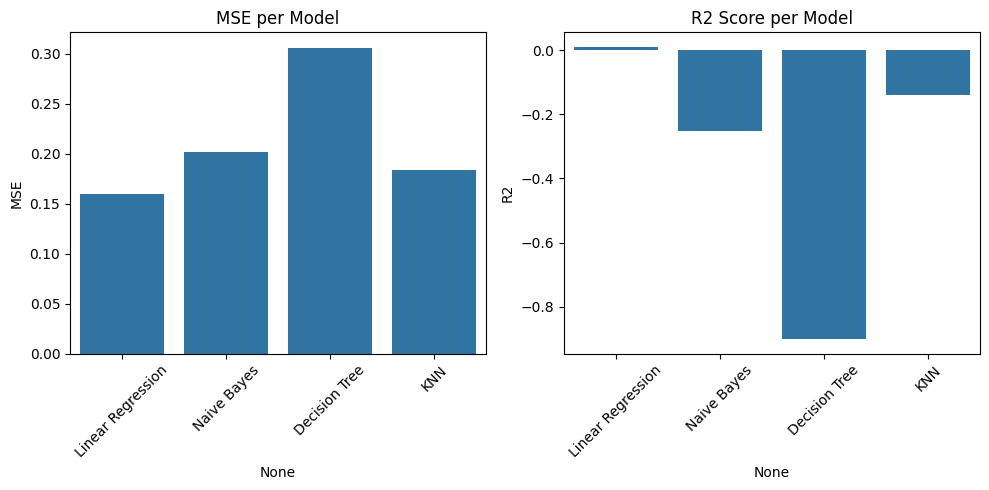

In [11]:
# 8. Visualisasi Hasil Evaluasi

# Mengubah dictionary hasil evaluasi ke dalam bentuk DataFrame dan mentranspose-nya
# Sehingga model menjadi baris dan metrik (MSE, R2) menjadi kolom
results_df = pd.DataFrame(results).T

# Membuat figure dengan ukuran 10x5 inci dan membaginya menjadi 2 plot samping
plt.figure(figsize=(10, 5))

# Plot pertama: visualisasi Mean Squared Error untuk setiap model
plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y='MSE', data=results_df)
plt.title('MSE per Model')
plt.xticks(rotation=45)  # Memiringkan label sumbu X agar mudah dibaca

# Plot kedua: visualisasi R2 Score untuk setiap model
plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y='R2', data=results_df)
plt.title('R2 Score per Model')
plt.xticks(rotation=45)

# Menyesuaikan tata letak agar tidak saling menumpuk
plt.tight_layout()
plt.show()

Kode ini menampilkan visualisasi perbandingan performa model berdasarkan dua metrik utama: MSE (semakin kecil semakin baik) dan R² Score (semakin mendekati 1 semakin baik). Hasil prediksi yang sebelumnya disimpan dalam dictionary results diubah ke dalam bentuk DataFrame agar bisa diplot dengan seaborn. Dengan grafik ini, kita bisa dengan mudah melihat model mana yang paling akurat dan efisien.

## Rekomendasi

In [9]:
# 9. Rekomendasi

# Menampilkan rekomendasi model terbaik berdasarkan skor R² tertinggi
print("\nRekomendasi:")

# Mencari nama model dengan nilai R² paling tinggi
best_model = results_df['R2'].idxmax()

# Menampilkan nama model terbaik dan skor R²-nya
print(f"Model terbaik berdasarkan R2 adalah: {best_model} dengan skor R2 {results_df.loc[best_model, 'R2']:.2f}")


Rekomendasi:
Model terbaik berdasarkan R2 adalah: Linear Regression dengan skor R2 0.01


Bagian ini digunakan untuk memberikan rekomendasi akhir berdasarkan evaluasi model. Model dengan nilai R² tertinggi dianggap paling baik karena mampu menjelaskan variansi data target dengan paling akurat. Nilai R² tersebut ditampilkan bersama nama modelnya sebagai hasil akhir analisis.